# Plot pupil data

Dataset: Allen Institute for Brain Science: Visual Coding - Neuropixels  
© 2015 Allen Institute for Brain Science. Allen Brain Atlas API. Available from: https://portal.brain-map.org/explore/circuits/visual-coding-neuropixels

## Set-up

### set paths

In [1]:
# set paths
PROJECT_PATH = "G:/Shared drives/visual_encoding" # shared results directory

### imports

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# imports
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neo

In [4]:
# custom imports
import sys
sys.path.append('../../')
from allen_vc.neo_utils import get_analogsignal, get_analogsignal_names

## Plot pupil area time-series and distribution

### plot an example session

[Text(0.5, 0, 'pupil area')]

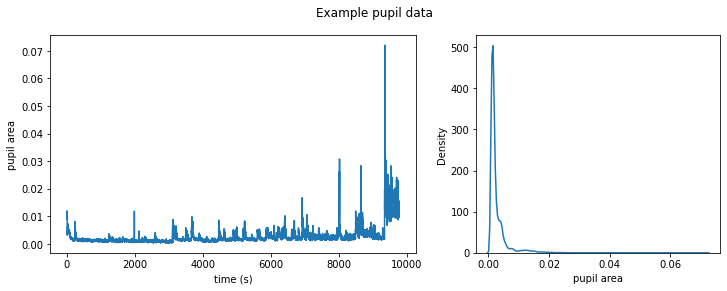

In [8]:
# plot data for an example session

# choose example session of interest
SESSION_ID = 766640955 # example session id

# load example block and get pupil data
block = neo.io.NeoMatlabIO(f"{PROJECT_PATH}/data/blocks/sessions/block_{SESSION_ID}.mat").read_block()
pupil_area, time = get_analogsignal(block, 'pupil_area', segment_idx=0)

# init figure
fig, (ax0, ax1) = plt.subplots(1,2, figsize=[12,4], gridspec_kw={'width_ratios': [3,2]})
fig.suptitle('Example pupil data')

# plot time-series
ax0.plot(time, pupil_area)
ax0.set(xlabel="time (s)", ylabel="pupil area")

# plot distribution
sns.kdeplot(pupil_area, ax=ax1)
ax1.set(xlabel='pupil area')

### plot all sessions

In [9]:
# plot all sessions - import data

# init
pupil_area = []
pupil_time = []
sessions = []

# loop through all files
data_dir = f"{PROJECT_PATH}/data/blocks/sessions"
files = os.listdir(data_dir)
for i_file, fname in enumerate(files):
    # import data
    block = neo.io.NeoMatlabIO(f"{data_dir}/{fname}").read_block()
    a_sig_names = get_analogsignal_names(block)
    if 'pupil_area' not in a_sig_names:
        continue
    pupil_area_i, time_i = get_analogsignal(block, 'pupil_area', segment_idx=0)
    pupil_area.append(pupil_area_i[time_i<8000]) # keep time before opto
    pupil_time.append(time_i[time_i<8000])
    sessions.append(fname.split("_")[1].split(".")[0])


C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


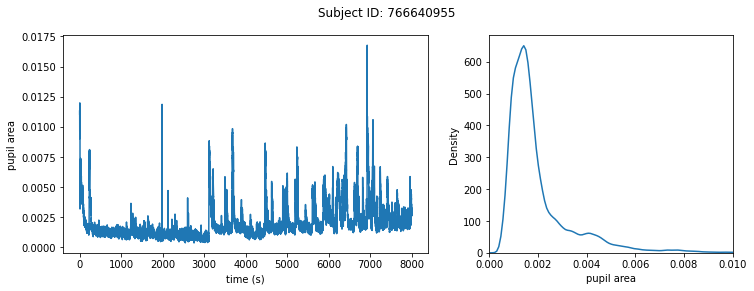

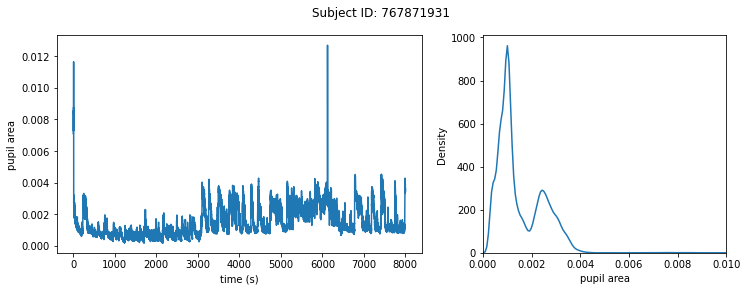

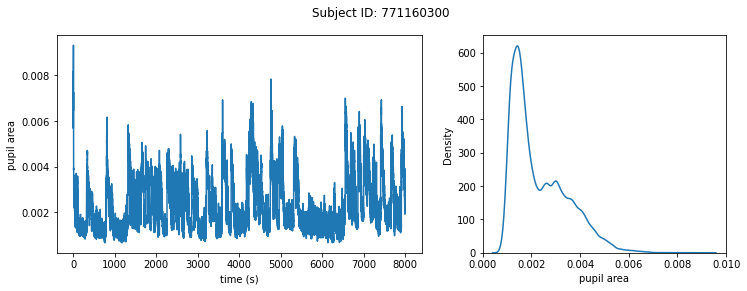

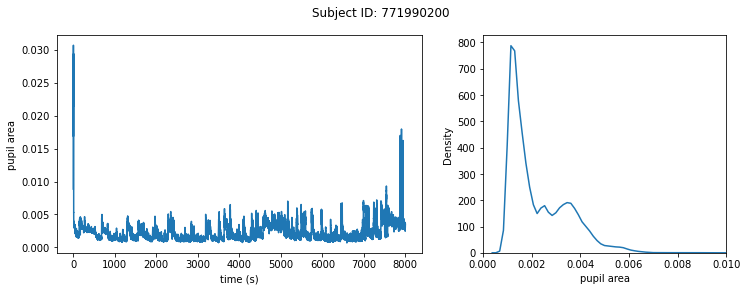

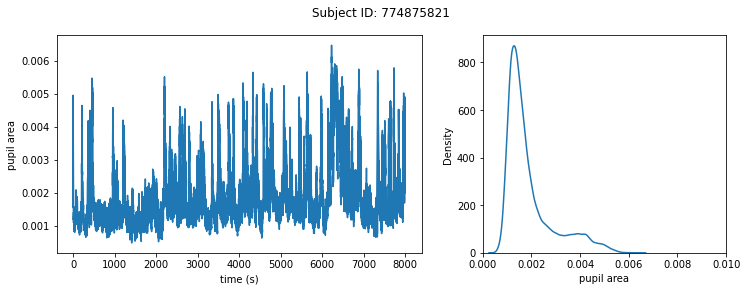

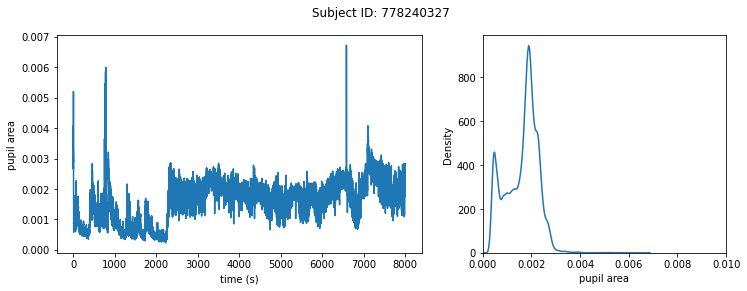

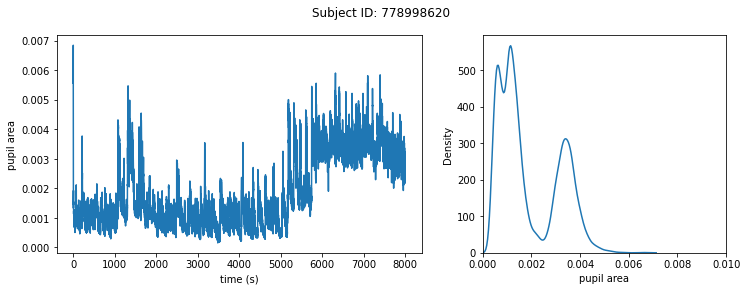

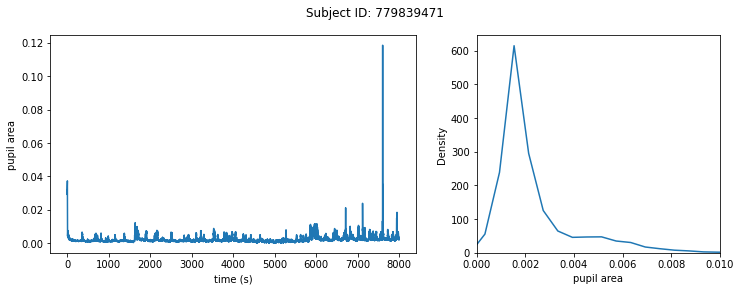

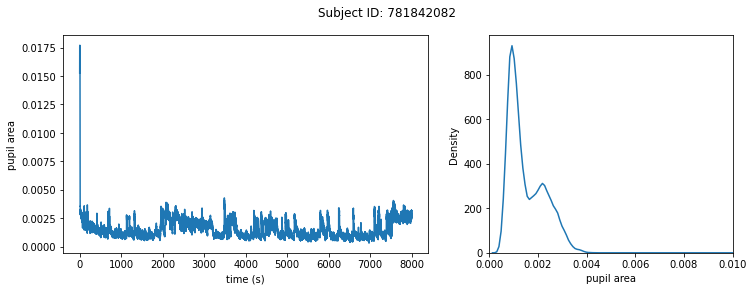

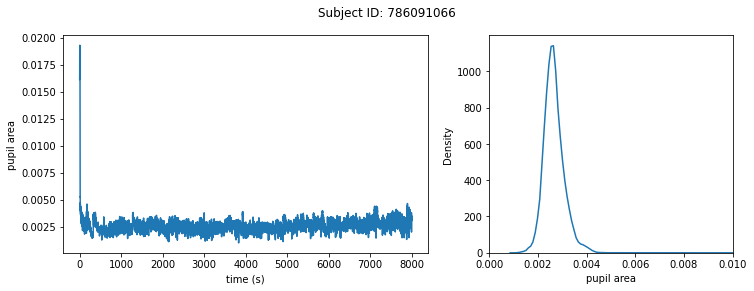

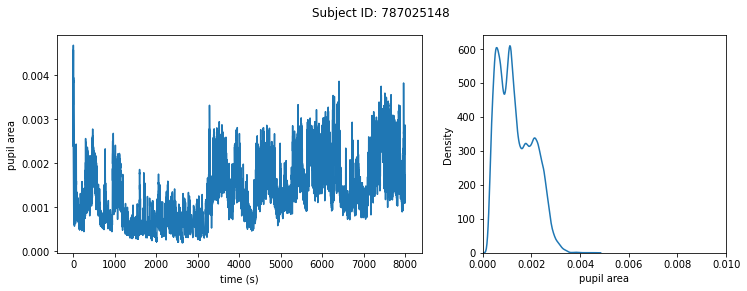

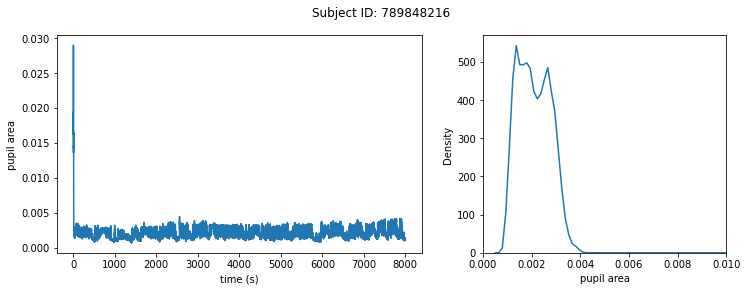

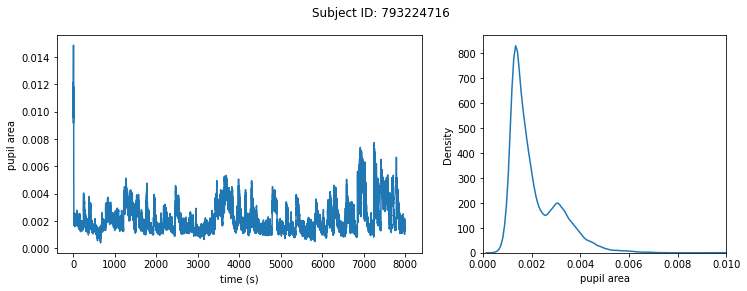

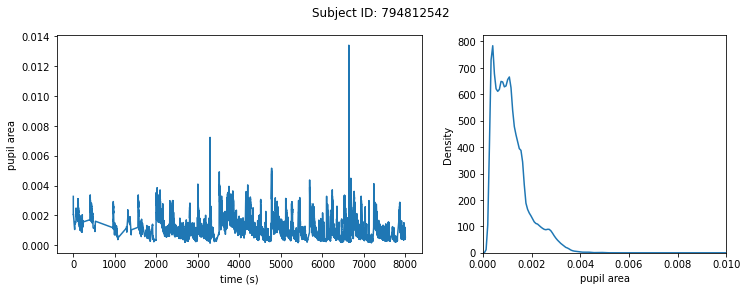

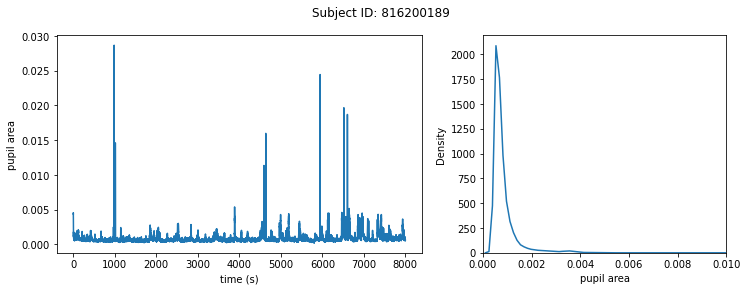

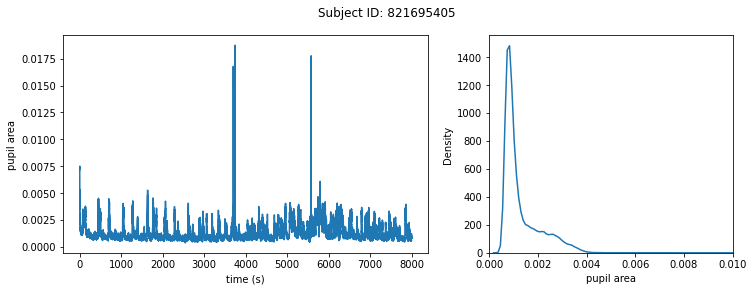

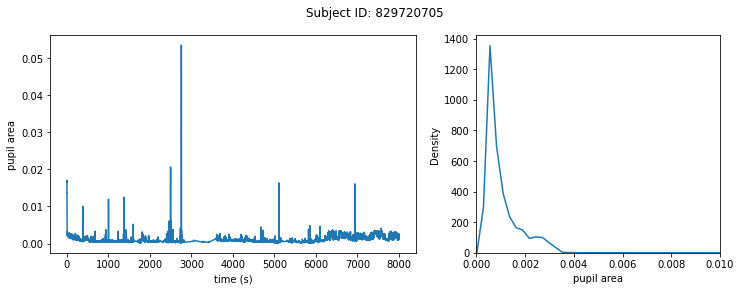

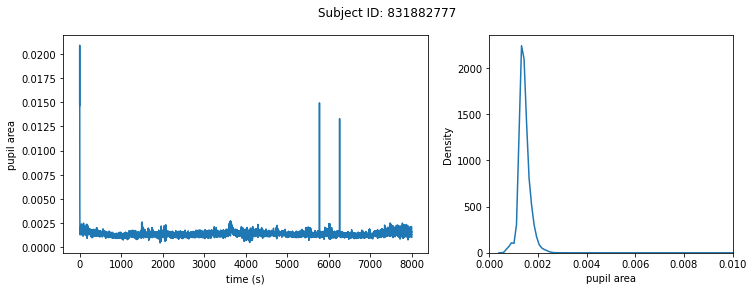

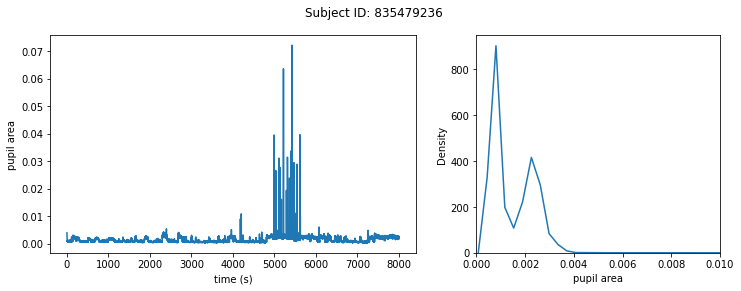

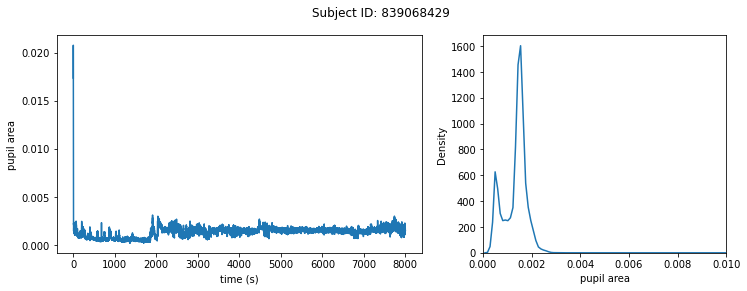

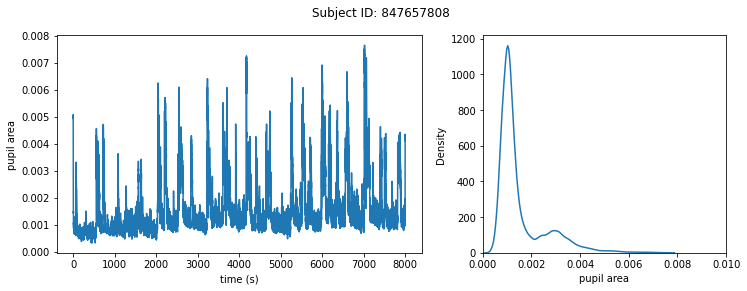

In [10]:
# plot all sessions

# loop through sessions
for distribution, time, session in zip(pupil_area, pupil_time, sessions):
    # plot
    fig, (ax0, ax1) = plt.subplots(1,2, figsize=[12,4], gridspec_kw={'width_ratios': [3,2]})
    fig.suptitle(f'Subject ID: {session}')
    ax0.plot(time, distribution)
    ax0.set(xlabel="time (s)", ylabel="pupil area")
    sns.kdeplot(distribution, ax=ax1)
    ax1.set(xlabel='pupil area')
    ax1.set_xlim([0,0.01])